In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [26]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.shape

(42000, 785)

In [28]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16720,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


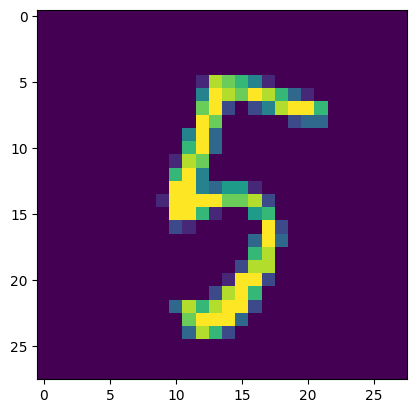

In [29]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[14628, 1:].values.reshape(28, 28))

In [30]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train.shape

(33600, 784)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
from sklearn.decomposition import PCA
#n_components if None- same number of principal components as that of number of columns
pca = PCA(n_components=100)

In [40]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [41]:
x_train_trf.shape

(33600, 100)

In [44]:
x_train.shape

(33600, 784)

In [42]:
knn1 = KNeighborsClassifier()

In [45]:
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [46]:
y_pred1 = knn.predict(x_test_trf)

In [47]:
accuracy_score(y_test, y_pred1)

0.9546428571428571

Point to note here is that with 784 columns you were getting the accuracy as 96 and after pca, by reducing the dimension you are getting the accuracy as 95 percent


In [48]:
for i in range(1, 785):
    pca = PCA(n_components = i)
    xtrain_trf = pca.fit_transform(x_train)
    xtest_trf = pca.transform(x_test)
    knn_pca = KNeighborsClassifier()
    knn_pca.fit(xtrain_trf, y_train)
    ypred_pca = knn_pca.predict(xtest_trf)
    print(accuracy_score(y_test, ypred_pca))

0.2567857142857143
0.32416666666666666
0.5102380952380953
0.6663095238095238
0.7382142857142857
0.8221428571428572
0.8433333333333334
0.8717857142857143
0.8864285714285715
0.9055952380952381
0.9116666666666666
0.9183333333333333
0.9277380952380953
0.935
0.9384523809523809
0.9383333333333334
0.9398809523809524
0.9398809523809524
0.9414285714285714
0.9438095238095238
0.9439285714285715
0.9438095238095238
0.9446428571428571
0.9453571428571429
0.9475
0.9483333333333334


KeyboardInterrupt: 

In [49]:
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [50]:
x_train_trf

array([[-2.71863433, -0.48895347],
       [-0.67694377, -6.75161478],
       [-3.03320663,  6.50760877],
       ...,
       [ 2.14876692,  0.77993547],
       [ 1.05954834,  0.9473703 ],
       [17.70259441,  1.96361124]])

In [52]:
#2D - plotting all the 33600 points
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = x_train_trf[:, 0],y = x_train_trf[:, 1], color = y_train_trf, color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [53]:
#3D - plotting all the 33600 points in 3D
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


In [54]:
x_train_trf

array([[-2.71863872, -0.48959886,  1.13543073],
       [-0.67698245, -6.75433875, -2.33559953],
       [-3.03323071,  6.5097935 ,  7.49193338],
       ...,
       [ 2.14882324,  0.78049509, -0.74768527],
       [ 1.05956287,  0.94843728,  3.94951495],
       [17.7025997 ,  1.96219793, -4.94389478]])

In [55]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:, 0], y=x_train_trf[:, 1], z=x_train_trf[:, 2], color=y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [56]:
pca.explained_variance_
#Eigen values

array([40.67111198, 29.1702338 , 26.74459614])

In [57]:
pca.components_
#Eigen vectors

array([[ 1.26499217e-18, -1.56864078e-18,  7.71884749e-22, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.80186532e-18, -1.08811163e-18, -1.45409765e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.12803797e-17,  2.80399058e-17,  1.78715551e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [58]:
pca.explained_variance_ratio_
#able to explain 12% of variance, which is very less it should atleast explain 90% of variance

array([0.05785192, 0.0414927 , 0.03804239])

In [59]:
#Finding optimum number of principle components
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [61]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [62]:
pca.components_

array([[-1.50074992e-19,  2.77555756e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20, -1.38777878e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -1.38777878e-17, -4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  6.77518817e-03,  7.97715344e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.81666233e-01,  1.25121896e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -2.74532268e-02,  9.16883896e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [64]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [66]:
#1, 2, 3, 4...
#cumsum = 1, 3, 6, 10,...
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

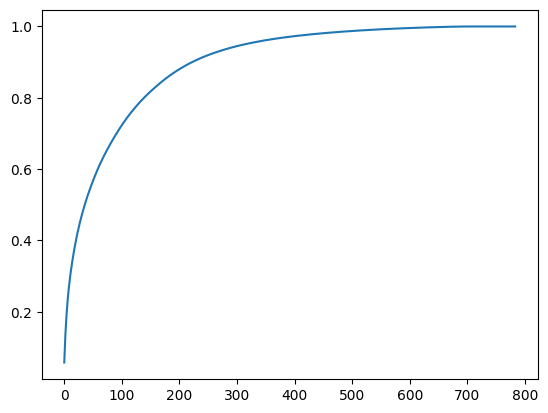

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

You can see in the graph around 90% of variance is explained by around 200 principal components